Project Title: Analysis of Global Happiness in 2023
This project  will analyze factors that contribute to happiness across different countries in 2023, focusing on key variables like GDP, social support, life expectancy, freedom, and others.

In [60]:
# Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import plotly.express as px
import nbformat


 Load the Data
I downloaded the World Happiness Report 2023 dataset from Kaggle

In [61]:
# Load the 2023 dataset
df = pd.read_csv('WHR2023.csv')

# Display the first few rows to understand the data structure
df.head()


,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


Explore and Understand the Data

In [62]:
# Get a quick summary of the dataset
df.info()


df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,137.000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,136.000000
mean,5.539796,0.064715,5.666526,5.412971,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401,1.778,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898,1.777838
std,1.139929,0.023031,1.117421,1.163724,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956,0.000,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723,0.504390
min,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.724000,0.047000,4.980000,4.496000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000,1.778,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000,1.555250
50%,5.684000,0.060000,5.797000,5.529000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000,1.778,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000,1.848500
75%,6.334000,0.077000,6.441000,6.243000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000,1.778,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000,2.078750
max,7.804000,0.147000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


Data Cleaning
Checks for missing values and handles them. For the 2023 dataset, i had to look for missing or incorrect data



In [63]:
# Check for missing values in the dataset
df.isnull().sum()

# Handle missing values 
df.fillna(df.mean(), inplace=True)

C:\Users\chris\AppData\Local\Temp\ipykernel_15536\3241672259.py:5: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [104]:
print(df.columns)


Index(['Country name', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')


Exploratory Data Analysis (EDA)
Now, we will explore the data visually to understand the distribution and relationships between variables.

A. Distribution of Happiness Scores
Plot the distribution of happiness scores across countries

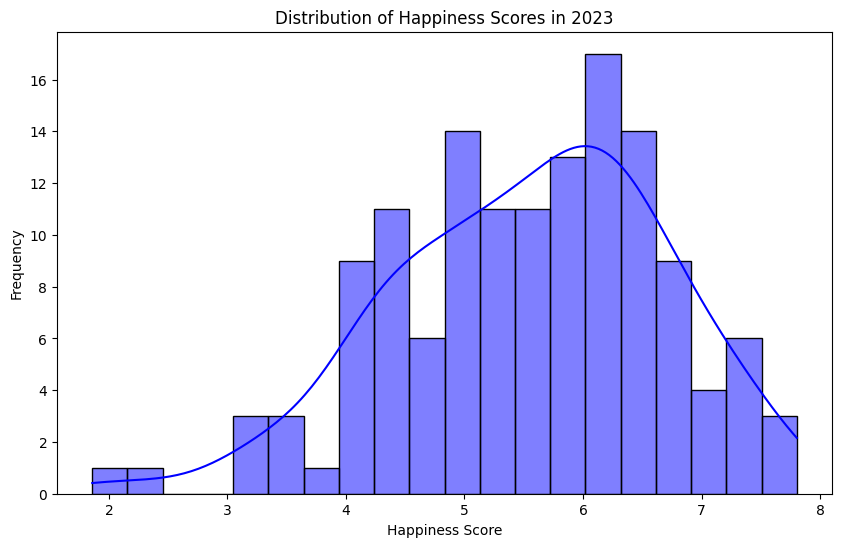

In [105]:

plt.figure(figsize=(10,6))
sns.histplot(df['Ladder score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Happiness Scores in 2023')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


Top 10 Happiest and Least Happy Countries

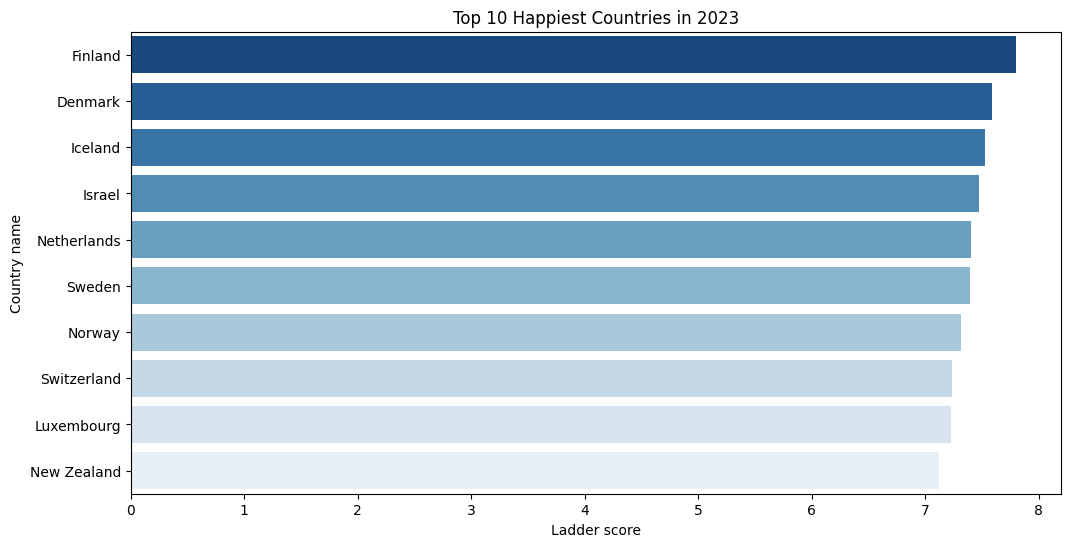

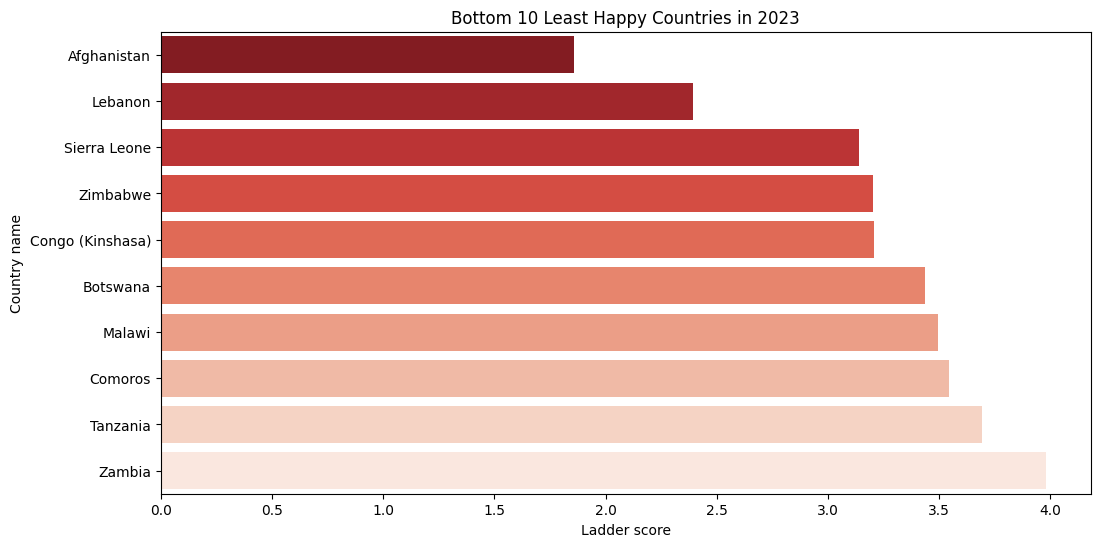

In [66]:

top10 = df[['Country name', 'Ladder score']].sort_values(by='Ladder score', ascending=False).head(10)


bottom10 = df[['Country name', 'Ladder score']].sort_values(by='Ladder score').head(10)


plt.figure(figsize=(12,6))
sns.barplot(x='Ladder score', y='Country name', data=top10, palette='Blues_r')
plt.title('Top 10 Happiest Countries in 2023')
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(x='Ladder score', y='Country name', data=bottom10, palette='Reds_r')
plt.title('Bottom 10 Least Happy Countries in 2023')
plt.show()


Correlation Matrix

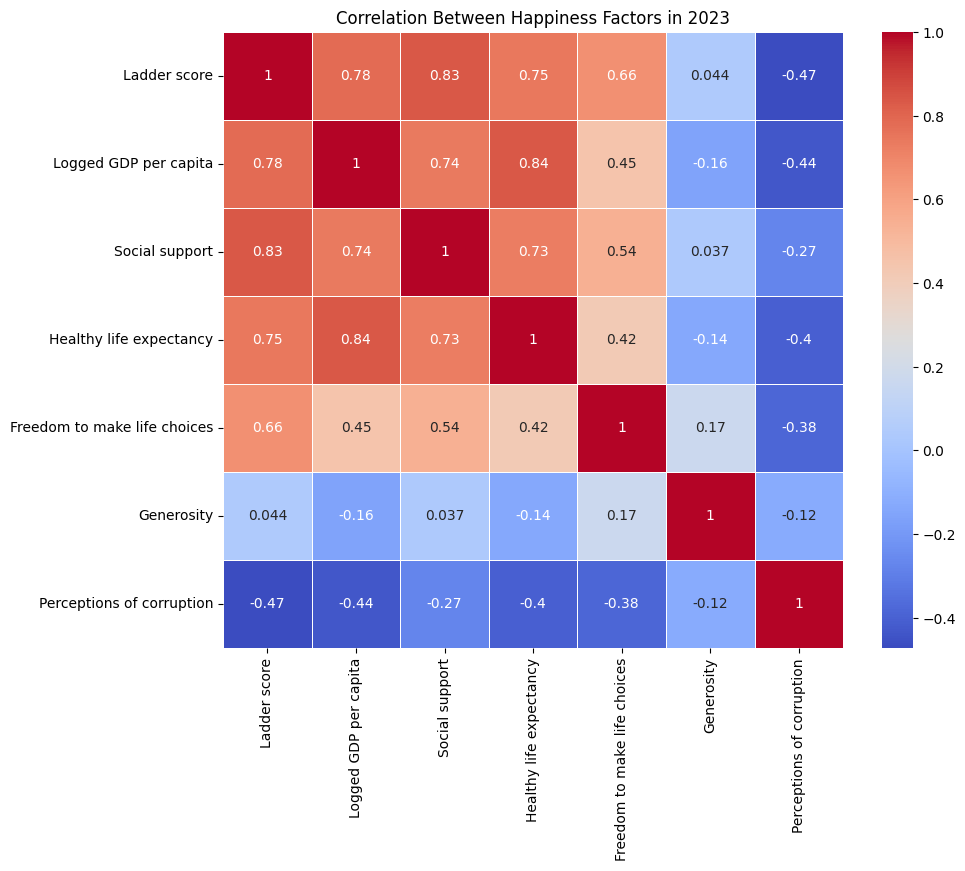

In [106]:

correlation_matrix = df[['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
                         'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].corr()


plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Happiness Factors in 2023')
plt.show()


Relationship Between Happiness and GDP

In [68]:
# Sort the dataset by 'Logged GDP per capita'
df_sorted = df.sort_values(by='Logged GDP per capita')


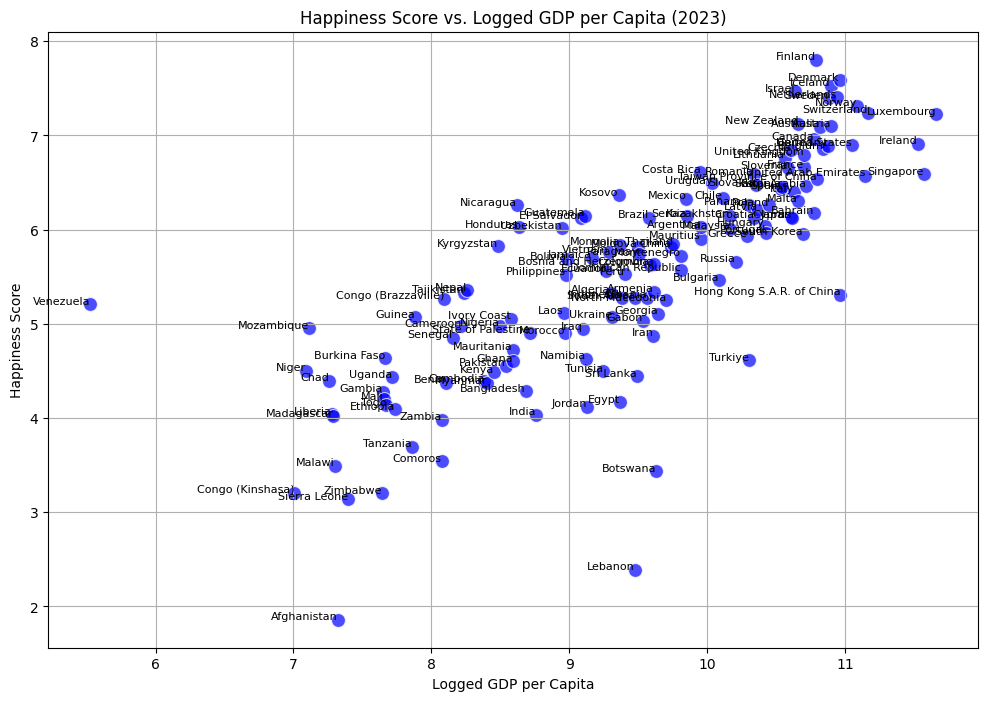

In [69]:
# Scatter plot between Logged GDP per Capita and Happiness Score
plt.figure(figsize=(12,8))
sns.scatterplot(x='Logged GDP per capita', y='Ladder score', data=df_sorted, s=100, color='blue', edgecolor='w', alpha=0.7)

# Annotate the points with country names
for i in range(len(df_sorted)):
    plt.text(df_sorted['Logged GDP per capita'].iloc[i],
             df_sorted['Ladder score'].iloc[i],
             df_sorted['Country name'].iloc[i],
             fontsize=8,
             ha='right')

plt.title('Happiness Score vs. Logged GDP per Capita (2023)')
plt.xlabel('Logged GDP per Capita')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()


Relationship between Social support and Happiness

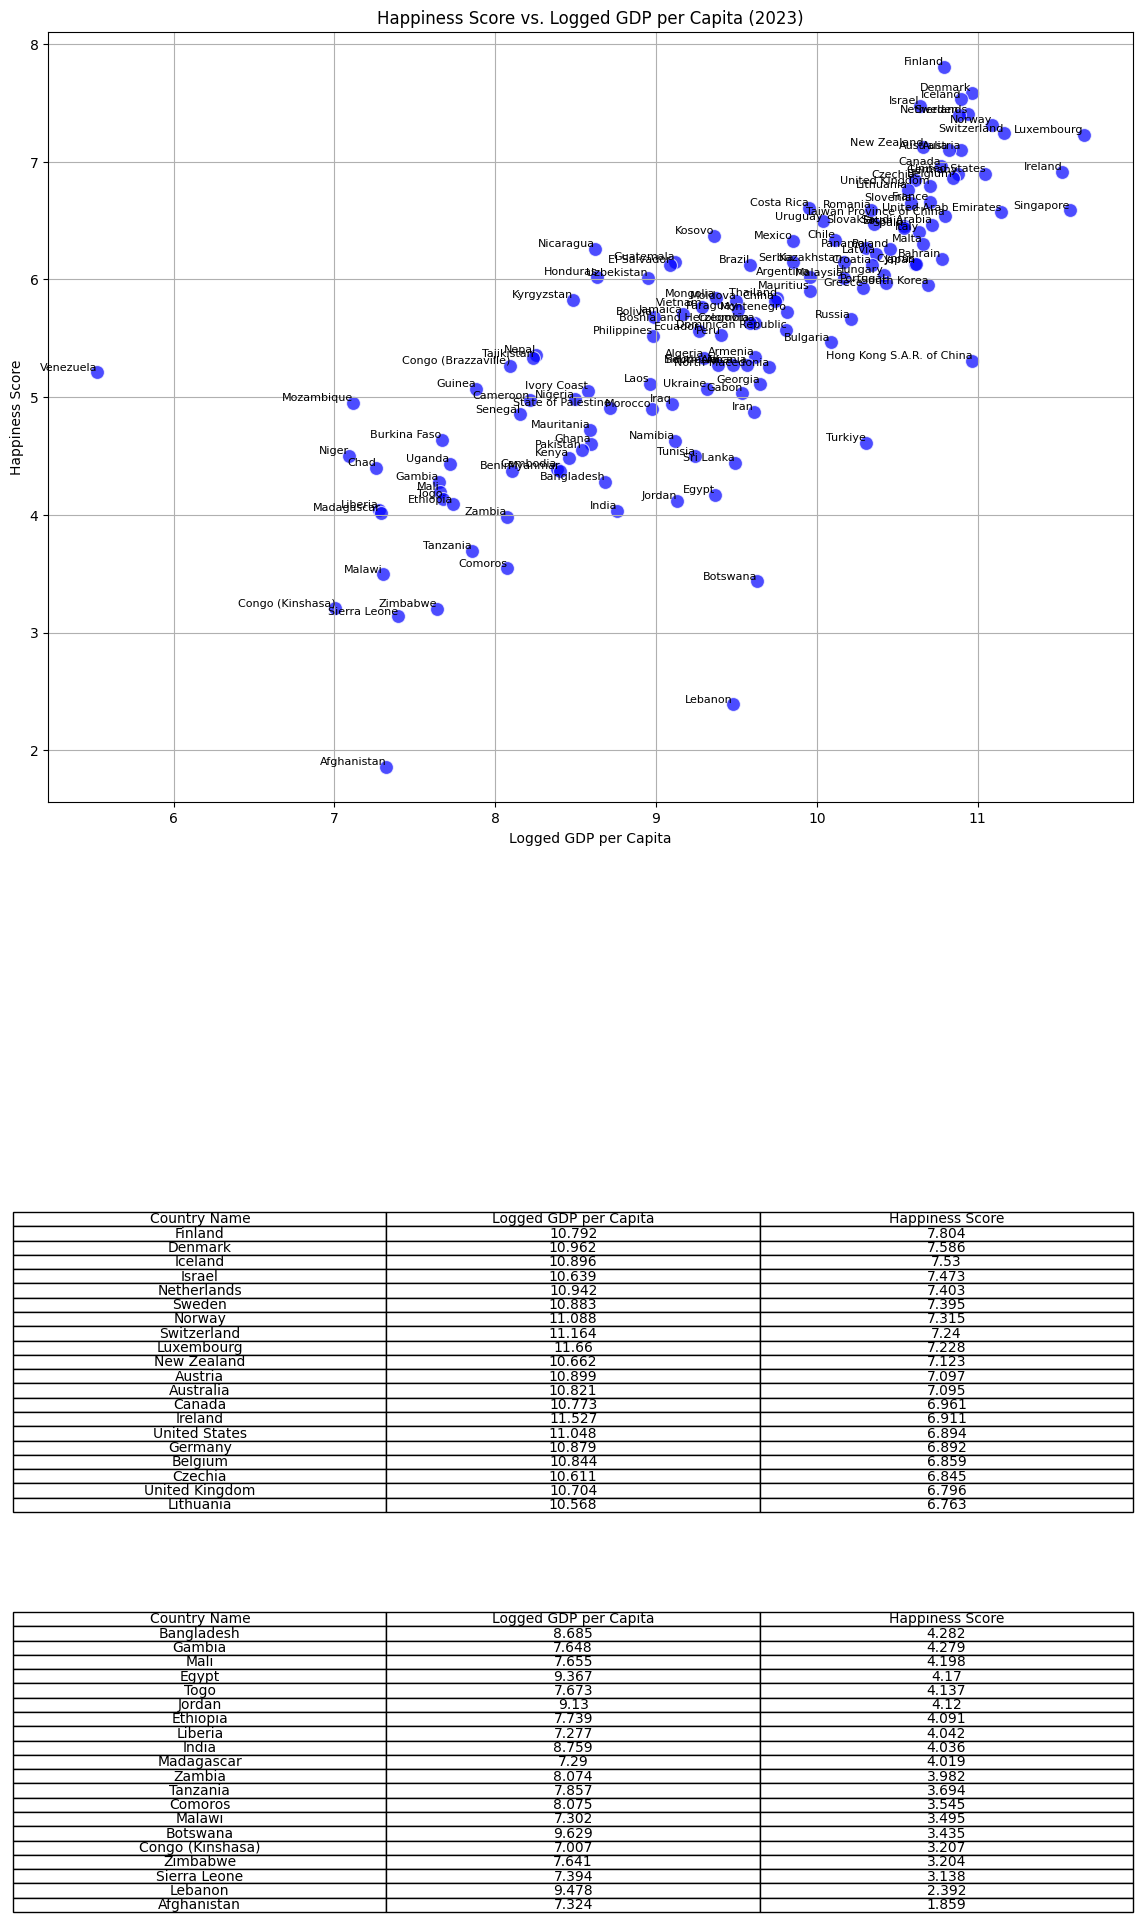

In [94]:


# Sort the dataset by 'Ladder score' for the top 20 happiest and bottom 20 least happy countries
df_sorted_by_happiness = df.sort_values(by='Ladder score', ascending=False)

# Top 20 happiest countries
df_top_20 = df_sorted_by_happiness.head(20)


df_bottom_20 = df_sorted_by_happiness.tail(20)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(14, 10))

# Scatter plot for all countries
sns.scatterplot(x='Logged GDP per capita', y='Ladder score', data=df, s=100, color='blue', edgecolor='w', alpha=0.7, ax=ax)

# Annotate the points with country names
for i in range(len(df)):
    ax.text(df['Logged GDP per capita'].iloc[i],
            df['Ladder score'].iloc[i],
            df['Country name'].iloc[i],
            fontsize=8,
            ha='right',
            va='bottom')

# Title and labels
ax.set_title('Happiness Score vs. Logged GDP per Capita (2023)')
ax.set_xlabel('Logged GDP per Capita')
ax.set_ylabel('Happiness Score')
ax.grid(True)

# Create tables for Top 20 and Bottom 20
# Add a table for the top 20 happiest countries
table_ax1 = fig.add_axes([0.1, -0.6, 0.8, 0.3])  # Adjust position and size of the table
table_ax1.axis('off')  # Hide the axes

# Create a table from the DataFrame for the top 20
tbl1 = table_ax1.table(cellText=df_top_20[['Country name', 'Logged GDP per capita', 'Ladder score']].values,
                       colLabels=['Country Name', 'Logged GDP per Capita', 'Happiness Score'],
                       cellLoc='center',
                       loc='center',
                       bbox=[0, 0, 1, 1])

# Style the table
tbl1.auto_set_font_size(False)
tbl1.set_fontsize(10)
tbl1.scale(1.2, 1.2)  # Adjust the scale as needed

# Add a table for the bottom 20 least happy countries
table_ax2 = fig.add_axes([0.1, -1.0, 0.8, 0.3])  # Adjust position and size of the table
table_ax2.axis('off')  # Hide the axes

# Create a table from the DataFrame for the bottom 20
tbl2 = table_ax2.table(cellText=df_bottom_20[['Country name', 'Logged GDP per capita', 'Ladder score']].values,
                       colLabels=['Country Name', 'Logged GDP per Capita', 'Happiness Score'],
                       cellLoc='center',
                       loc='center',
                       bbox=[0, 0, 1, 1])

# Style the table
tbl2.auto_set_font_size(False)
tbl2.set_fontsize(10)
tbl2.scale(1.2, 1.2) 

plt.show()


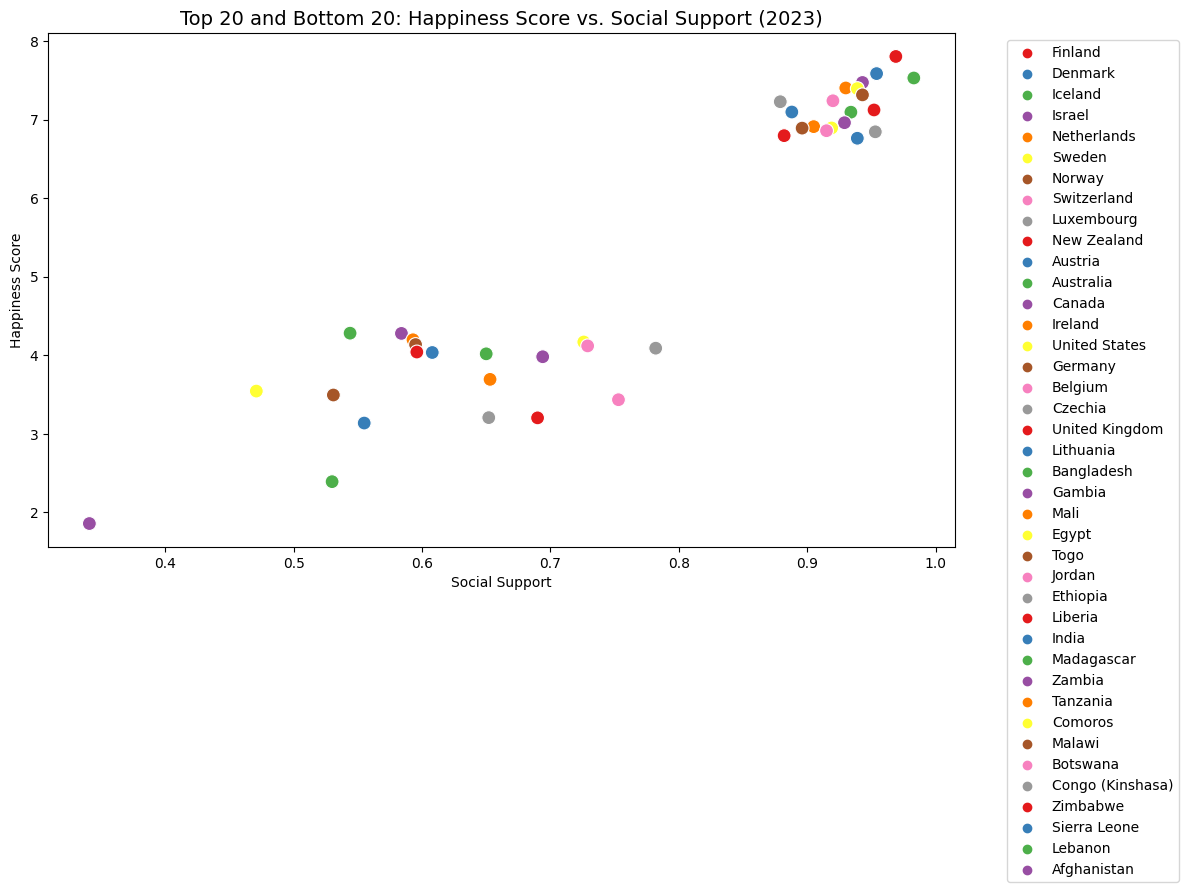

In [111]:

# Sort the DataFrame by Ladder score (Happiness score)
df_sorted = df.sort_values(by='Ladder score', ascending=False)

# Select Top 20 happiest countries
top_20 = df_sorted.head(20)

bottom_20 = df_sorted.tail(20)

# Combine the two datasets
top_bottom_40 = pd.concat([top_20, bottom_20])

# Scatter plot between Social Support and Happiness Score for top and bottom 20 countries
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Social support', y='Ladder score', hue='Country name', data=top_bottom_40, palette='Set1', s=100)

# Add plot title and labels
plt.title('Top 20 and Bottom 20: Happiness Score vs. Social Support (2023)', fontsize=14)
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  # Adjust the plot

plt.show()


Pairplot of Key Variables

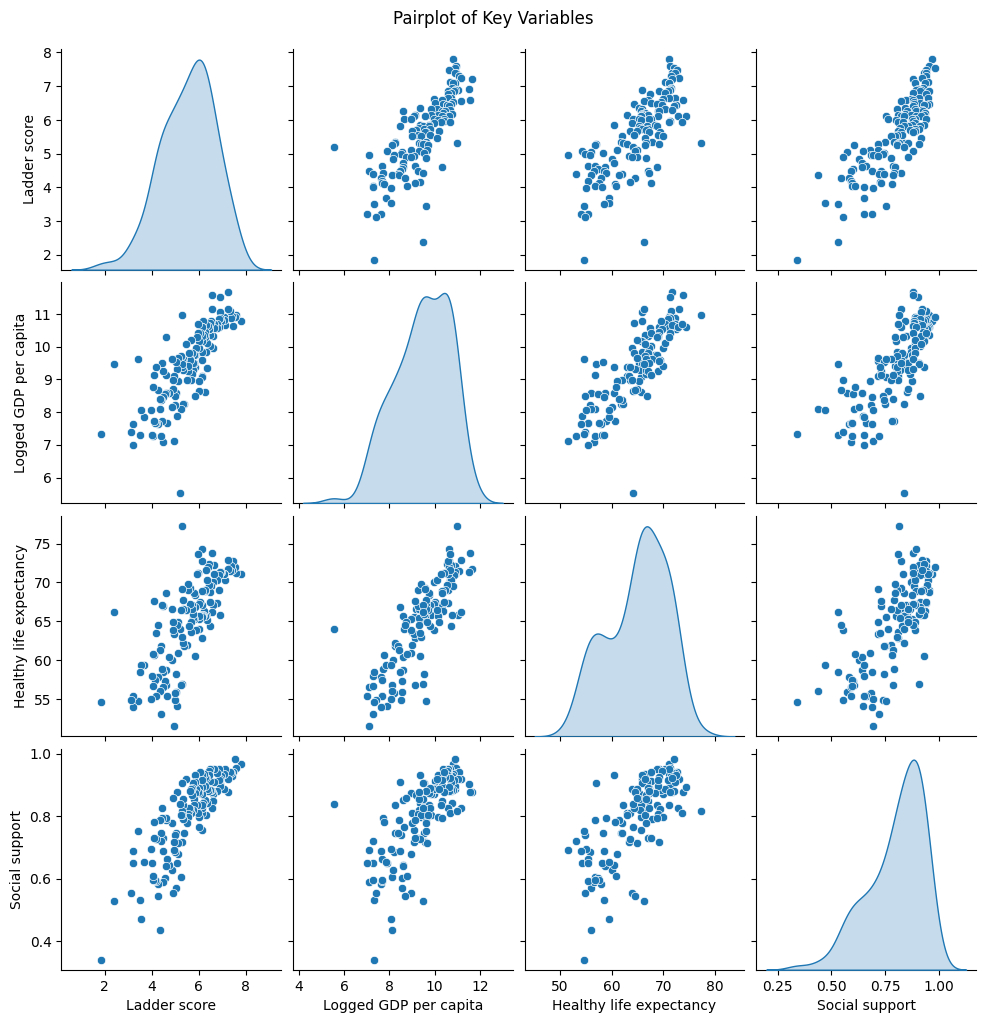

In [71]:
# Pairplot of key variables
sns.pairplot(df[['Ladder score', 'Logged GDP per capita', 'Healthy life expectancy', 'Social support']], diag_kind='kde')
plt.suptitle('Pairplot of Key Variables', y=1.02)  # Add title and adjust position
plt.show()

Multiple Linear Regression

Prepared the data with features and target variables

In [72]:
# Prepare features (X) and target (y)
X = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']]
y = df['Ladder score']


Split data

In [73]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train the model

In [74]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Make predictions and Evaluate the model

In [75]:

y_pred = model.predict(X_test)

# Evaluate the model 
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Display model coefficients
print("Coefficients:", model.coef_)


R-squared Value: 0.7991605546288297
Coefficients: [0.20564384 4.15433164 0.01918254 2.49617672]


In this analysis, a multiple linear regression was performed to assess how various factors influence the Happiness Score (Ladder score). The model's R-squared value is 0.799, indicating that 79.9% of the variance in happiness can be explained by the following variables:

Logged GDP per Capita: A positive coefficient (0.2056) suggests that wealthier countries tend to have higher happiness levels.

Social Support: The strongest predictor with a coefficient of 4.1543, showing that greater social support is strongly associated with increased happiness.

Healthy Life Expectancy: A smaller positive coefficient (0.0192), indicating a minor impact on happiness.

Freedom to Make Life Choices: A significant contributor (2.4962), highlighting that personal freedom is an important factor in happiness.

Visualization

Bar Chart of Coefficients - This chart shows the relative importance of each factor in predicting the happiness score.

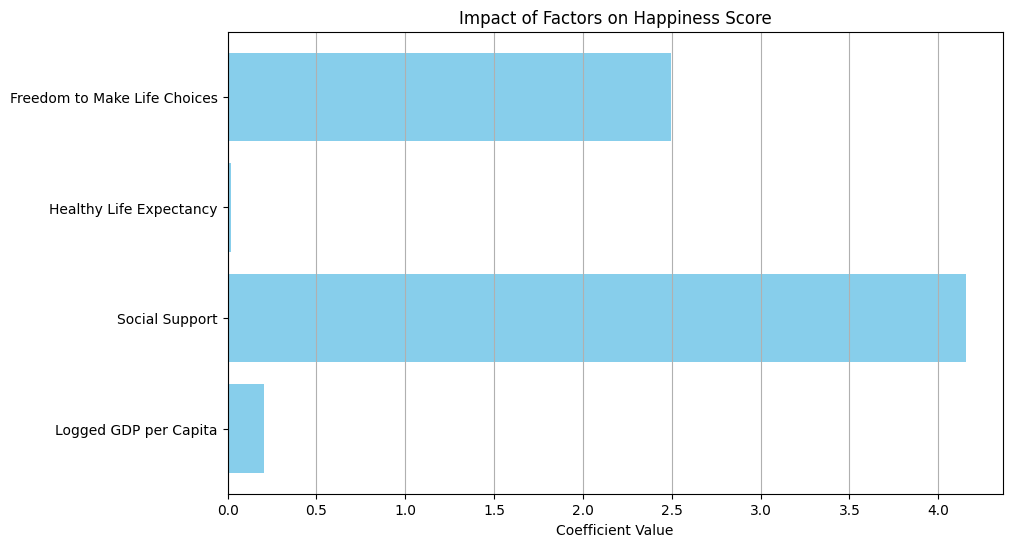

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Coefficients and variable names
coefficients = [0.2056, 4.1543, 0.0192, 2.4962]  
variables = ['Logged GDP per Capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom to Make Life Choices']

# Bar plot
plt.figure(figsize=(10, 6))
plt.barh(variables, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Impact of Factors on Happiness Score')
plt.grid(True, axis='x')
plt.show()


Residual Plot - This plot shows the difference between the actual and predicted happiness scores, which helps in evaluating how well the model fits the data.



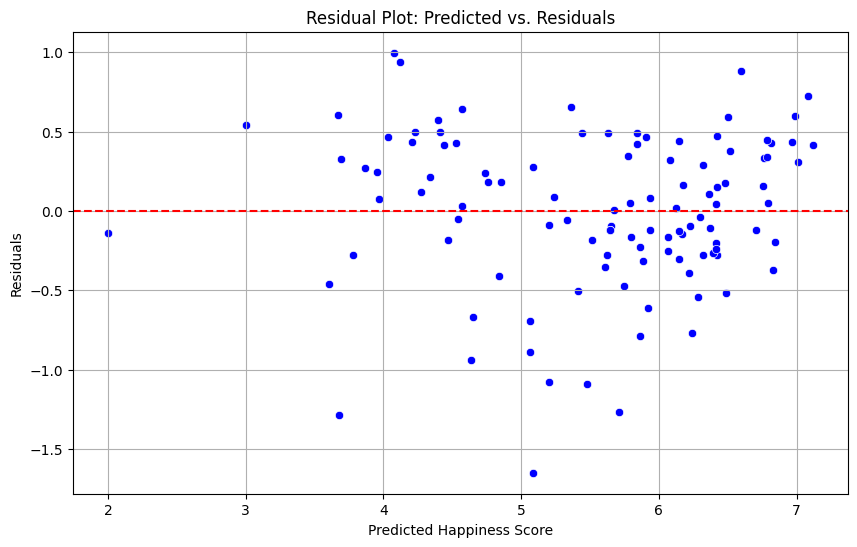

In [93]:
import seaborn as sns

# Predict the training set
y_train_pred = model.predict(X_train)

# Residuals
residuals = y_train - y_train_pred

# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Happiness Score')
plt.ylabel('Residuals')
plt.title('Residual Plot: Predicted vs. Residuals')
plt.grid(True)
plt.show()


Final Summary
A multiple linear regression was conducted to explore the relationship between various factors and the Happiness Score (Ladder score). The model achieved an R-squared value of 0.799, indicating that 79.9% of the variation in happiness can be explained by the selected variables.

Key Findings:
Social Support had the strongest impact, with a coefficient of 4.154, showing that countries with greater social safety nets tend to be happier.

Freedom to Make Life Choices also had a significant positive effect (2.496), suggesting personal freedom plays a major role in happiness.

Logged GDP per Capita showed a positive, but smaller, effect (0.205), meaning wealthier countries are generally happier.

Healthy Life Expectancy had the least impact (0.019), contributing marginally to happiness levels.

Visualization Insights:
A bar chart of coefficients illustrates the relative importance of each factor.
A residual plot shows no significant pattern in the errors, indicating a good fit for the model.
These results highlight the importance of social support and freedom in influencing happiness, while economic factors also play a role but to a lesser extent.







United Kingdom check

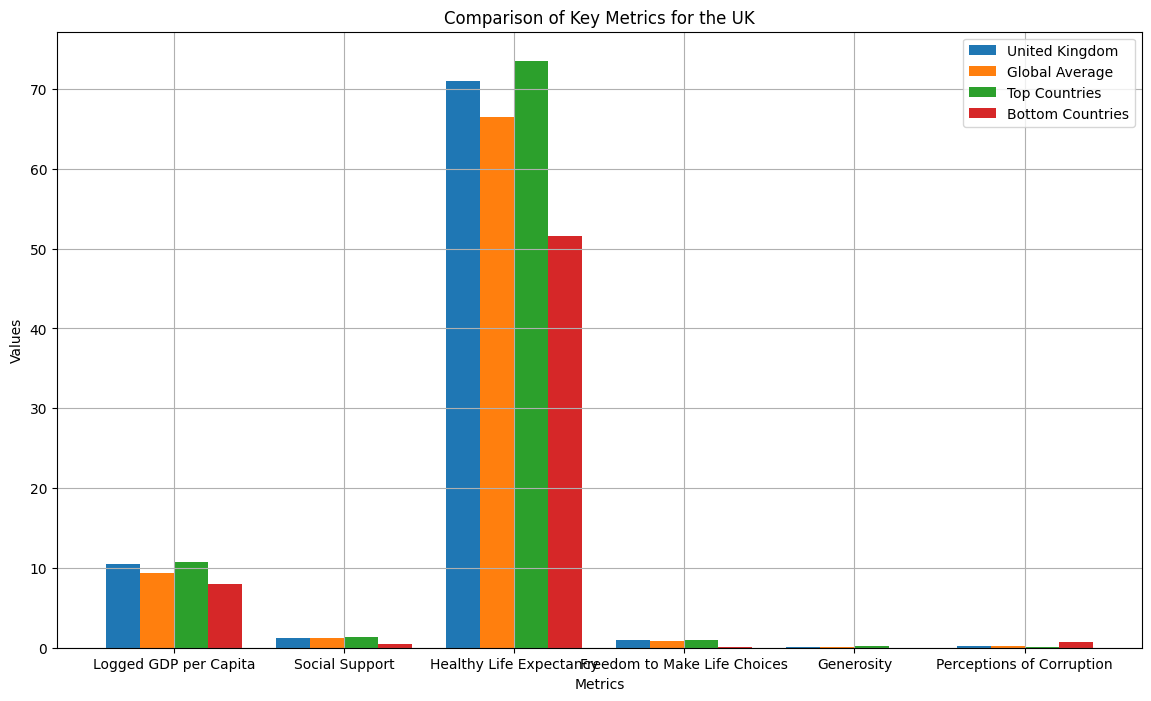

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Data for bar chart
metrics = ['Logged GDP per Capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom to Make Life Choices', 'Generosity', 'Perceptions of Corruption']
uk_values = [10.46, 1.28, 71.00, 0.92, 0.10, 0.19]
global_avg_values = [9.32, 1.22, 66.5, 0.80, 0.15, 0.25]
top_values = [10.73, 1.31, 73.50, 1.00, 0.22, 0.12]  
bottom_values = [8.04, 0.42, 51.60, 0.12, 0.02, 0.72]  

x = np.arange(len(metrics))  # the label locations
width = 0.2  

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - 1.5*width, uk_values, width, label='United Kingdom')
rects2 = ax.bar(x - 0.5*width, global_avg_values, width, label='Global Average')
rects3 = ax.bar(x + 0.5*width, top_values, width, label='Top Countries')
rects4 = ax.bar(x + 1.5*width, bottom_values, width, label='Bottom Countries')


ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Key Metrics for the UK')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.grid(True)
plt.show()


The pie chart below illustrates the relative contribution of each key factor to the overall happiness score for the United Kingdom. 

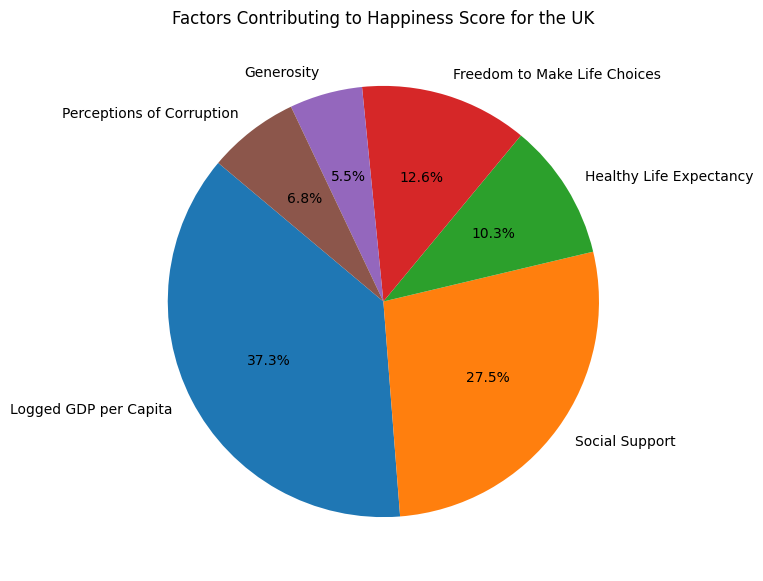

In [110]:

# Define factors and contributions 
factors = [
    'Logged GDP per Capita', 
    'Social Support', 
    'Healthy Life Expectancy', 
    'Freedom to Make Life Choices', 
    'Generosity', 
    'Perceptions of Corruption'
]



contributions = [
    uk_data['Explained by: Log GDP per capita'],
    uk_data['Explained by: Social support'],
    uk_data['Explained by: Healthy life expectancy'],
    uk_data['Explained by: Freedom to make life choices'],
    uk_data['Explained by: Generosity'],
    uk_data['Explained by: Perceptions of corruption']
]

# Normalize contributions to make sure they sum up to 1
total_contribution = sum(contributions)
contributions = [c / total_contribution for c in contributions]

plt.figure(figsize=(10, 7))
plt.pie(contributions, labels=factors, autopct='%1.1f%%', startangle=140)
plt.title('Factors Contributing to Happiness Score for the UK')
plt.show()


The summary highlights that GDP per Capita and Social Support contribute the most to the UK's happiness score, followed by Healthy Life Expectancy and Freedom to Make Life Choices.
Factors like Generosity and Perceptions of Corruption have smaller contributions but are still important.


The data can be used by policymakers, NGOs, and researchers to prioritize investments and initiatives in areas that will have the greatest impact on happiness, such as economic growth, healthcare, and social systems.
